Loaded graph bio_arenas-meta
Loaded graph bio_dimacs10-celegansneural
Loaded graph bio_foodweb-baydry
Loaded graph bio_foodweb-baywet
Loaded graph bio_maayan-Stelzl
bio_arenas-meta, AUC=37.73


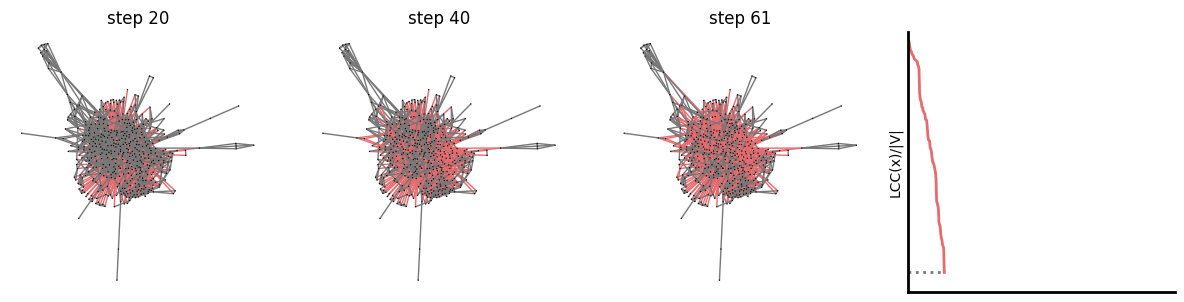

Loaded graph bio_maayan-figeys
bio_arenas-meta: AUC=37.72810890360559
bio_foodweb-baydry, AUC=45.05


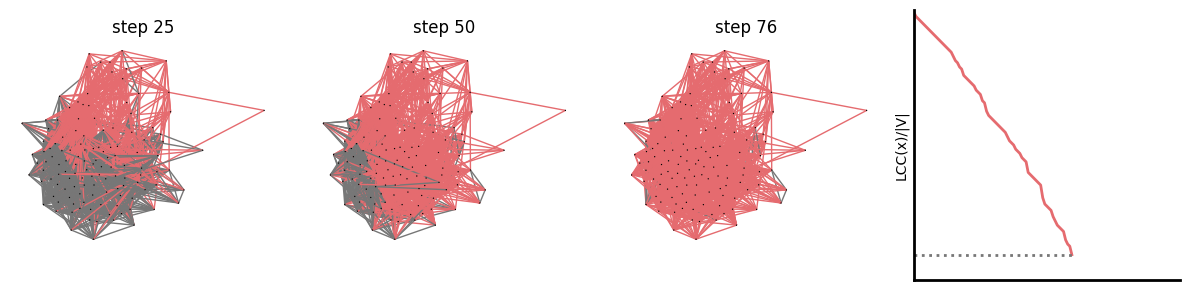

Loaded graph bio_maayan-foodweb
bio_foodweb-baydry: AUC=45.0546875
bio_foodweb-baywet, AUC=45.07


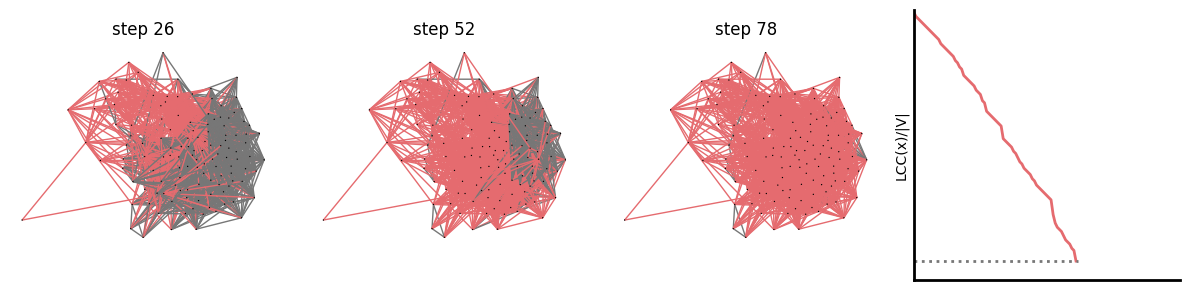

Loaded graph bio_maayan-vidal
bio_foodweb-baywet: AUC=45.06770833333333
bio_maayan-Stelzl, AUC=61.42


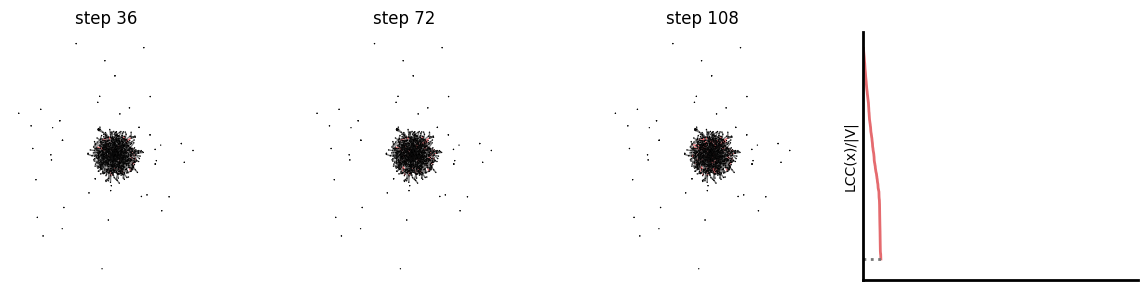

Loaded graph bio_moreno_propro
bio_maayan-Stelzl: AUC=61.42399374755764
bio_dimacs10-celegansneural, AUC=70.43


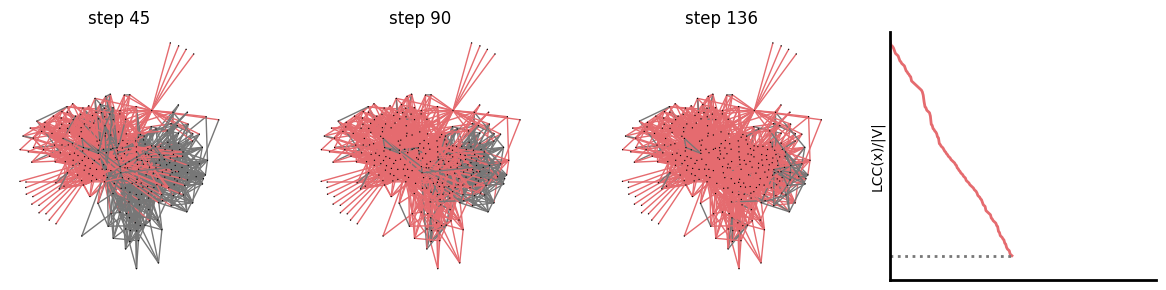

bio_dimacs10-celegansneural: AUC=70.43434343434342
bio_maayan-foodweb, AUC=31.97


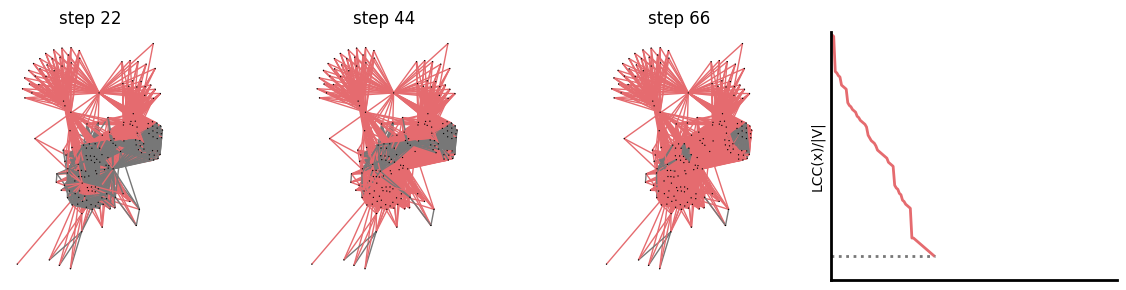

bio_maayan-foodweb: AUC=31.974499089253186
bio_moreno_propro, AUC=38.07


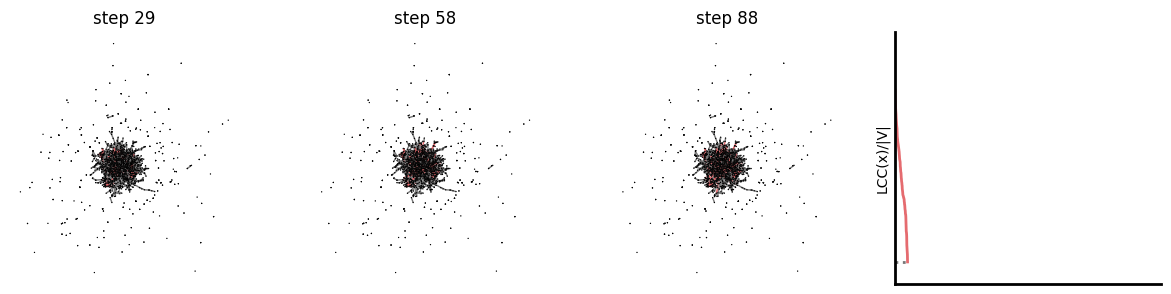

bio_moreno_propro: AUC=38.06559714795009
bio_maayan-figeys, AUC=63.69


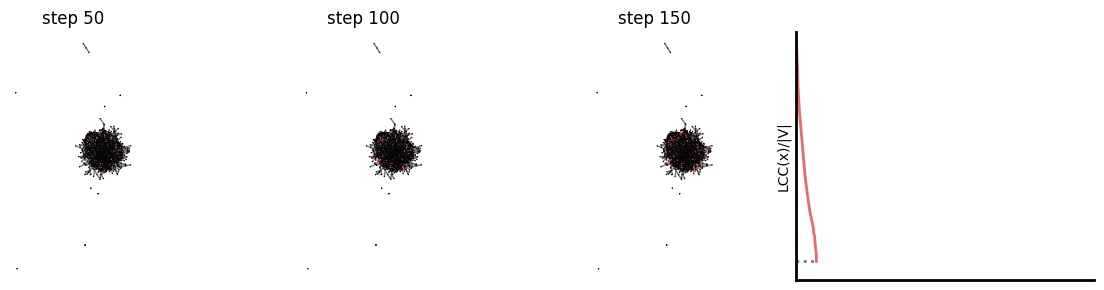

bio_maayan-figeys: AUC=63.69435760011909
bio_maayan-vidal, AUC=160.96


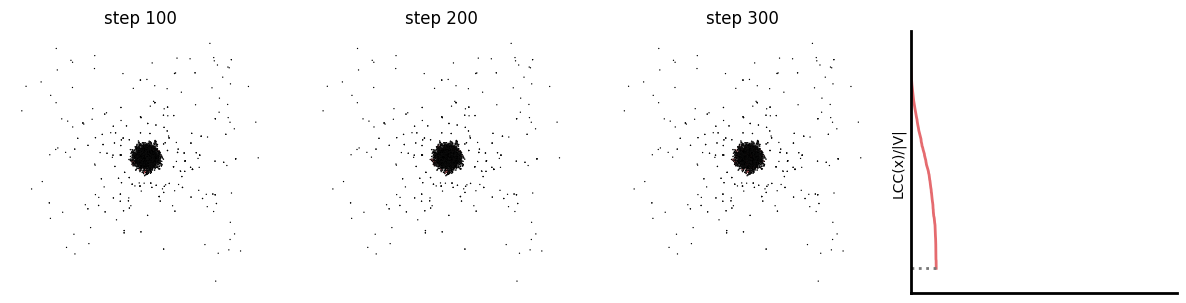

bio_maayan-vidal: AUC=160.95797425258007


In [1]:
from env import DismantleEnv
from utils import validate
import torch

from networks.dismantle import SACPolicy

render = True

# env = DismantleEnv('graphs/example', batch_size=5, is_val=True, render='plot')
env = DismantleEnv('graphs/real/bio', batch_size=5, is_val=True, render='plot')

sac = SACPolicy(
    num_features=16,
    num_heads=4,
    num_mps=6,
).to(torch.device('cpu'))
sac.load_state_dict(torch.load('saved/mind.ckpt', weights_only=True)['policy_state_dict'])

auc_list = validate(env, sac)